In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import TruncatedSVD
from wordcloud import STOPWORDS
from itertools import cycle

%matplotlib inline

from topic_modelling import *

In [9]:
with open('all_years_clean.pickle', 'rb') as f:
    all_years_clean = pickle.load(f)
    f.close()
with open('all_years_clean_sentiment2.pickle', 'rb') as f:
    all_years_clean2 = pickle.load(f)
    f.close()

In [3]:
# generate document-term matrix for all_years tweets using CountVectorizer
all_years_doc_term = doc_term_matrix(all_years_clean['tweet_text'], 'CV')
all_years_doc_term = pd.concat([all_years_doc_term, 
                                 all_years_clean[['ID', 'tweet_year', 'tweet_location']]], axis = 1)
all_years_doc_term.head()

,aaaaai,aaaah,aaaai,aaai,aaga,aahahhahaha,aaron,abc,abdul,abends,...,zju,zombie,zone,zuckerberg,zurich,zut,zypr,ID,tweet_year,tweet_location
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,544845252,2007,"Malham Close, Crawley, West Su"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,532130162,2007,"JP (Japan, Japan)"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,531926162,2007,Melbourne
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,524153882,2007,Barsoom!
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,523822582,2007,"JP (Japan, Japan)"


In [4]:
# calculate relative (mean) frequency of each term by year
all_years_by_year = all_years_doc_term.drop(columns = ['ID', 'tweet_location'])
all_years_by_year = all_years_by_year.groupby('tweet_year', as_index = False).mean()
all_years_by_year

,tweet_year,aaaaai,aaaah,aaaai,aaai,aaga,aahahhahaha,aaron,abc,abdul,...,zend,zero,zin,zju,zombie,zone,zuckerberg,zurich,zut,zypr
0,2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,2008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00202,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00202,0.000000
2,2009,0.000000,0.000000,0.000000,0.002037,0.000000,0.000000,0.000000,0.000000,0.002037,...,0.00000,0.00000,0.00000,0.000000,0.006110,0.000000,0.000000,0.000000,0.00000,0.000000
3,2010,0.000000,0.002016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,2011,0.002004,0.000000,0.002004,0.002004,0.000000,0.002004,0.000000,0.002004,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002004
5,2012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00202,0.000000,0.000000,0.000000,0.000000,0.006061,0.00000,0.000000
6,2013,0.000000,0.000000,0.000000,0.000000,0.008016,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,2014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.002004,0.000000,0.000000,0.000000,0.00000,0.000000
8,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004024,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.002012,0.000000,0.00000,0.000000
9,2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.010101,0.000000,0.000000,0.00000,0.000000


In [5]:
# show top 10 most common words by year
for ind, year in all_years_by_year.iterrows():
    top_10 = all_years_by_year.iloc[ind, 1:].sort_values(ascending = False)[0:10].index.tolist()
    print(int(year['tweet_year']), ': ', ', '.join(top_10), '\n', sep = '')

2007: new, itmedia, twitter, reading, saga, service, news, newspaper, chicken, support

2008: new, web, programming, stupidity, natural, selfridge, java, match, blog, just

2009: human, brain, mimics, stupidity, natural, match, software, movie, intelligent, means

2010: facebook, future, surge, near, stupidity, transform, web, natural, match, like

2011: stupidity, natural, match, learning, conference, international, theory, lecture, notes, real

2012: robot, lab, university, roboy, rich, shows, natural, stupidity, match, amp

2013: robots, flight, interstellar, complex, year, natural, stupidity, match, amp, new

2014: http, humans, machines, intelligent, happen, best, year, nglnd, amp, breakthroughs

2016: daily, amp, year, new, https, tech, future, learning, change, world

2017: human, technology, future, learning, latest, new, amp, machine, daverubal, year

2018: year, new, amp, future, learning, world, machine, human, read, video

2019: amp, learning, new, mikequindazzi, trust, nam

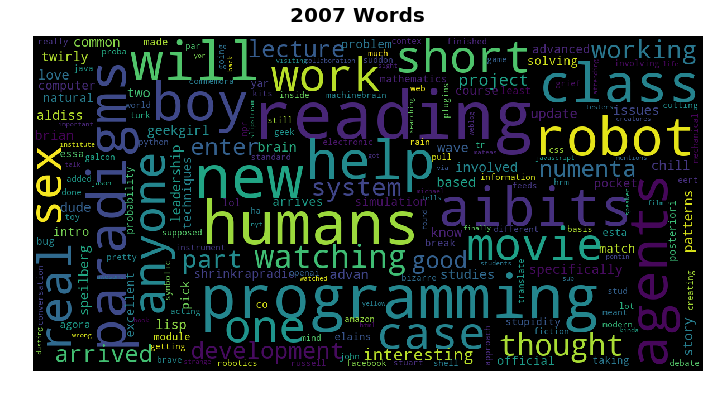

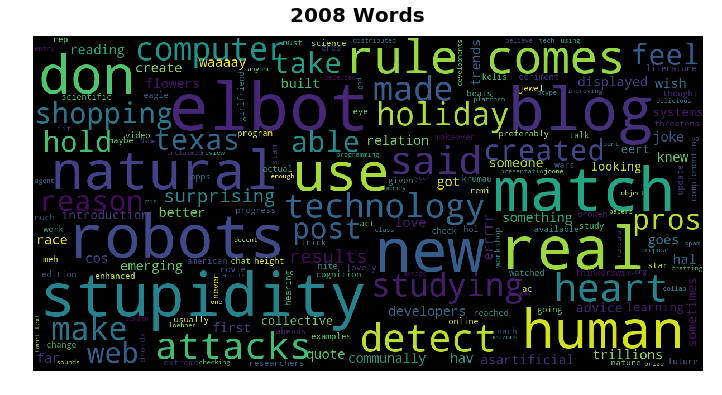

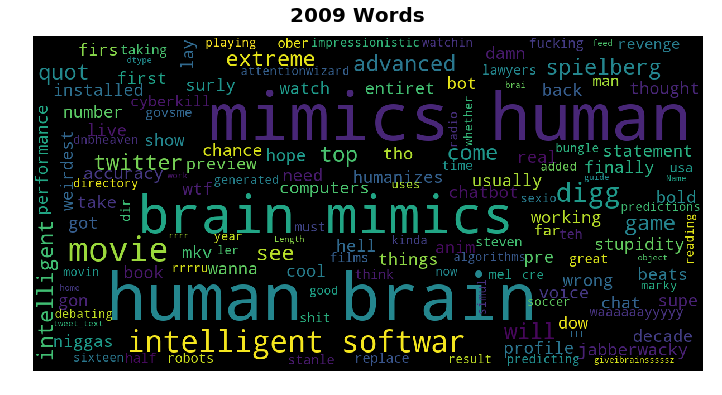

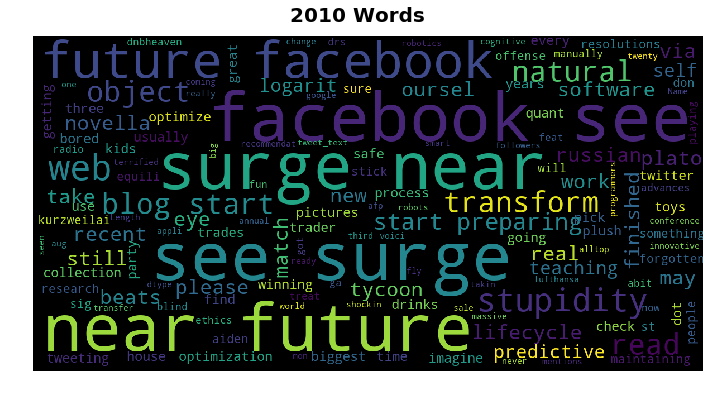

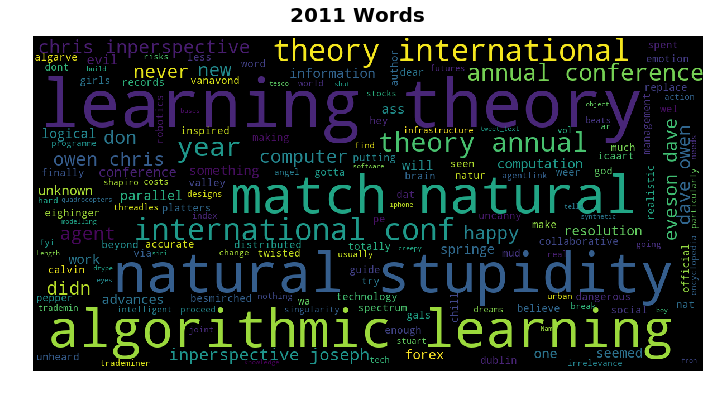

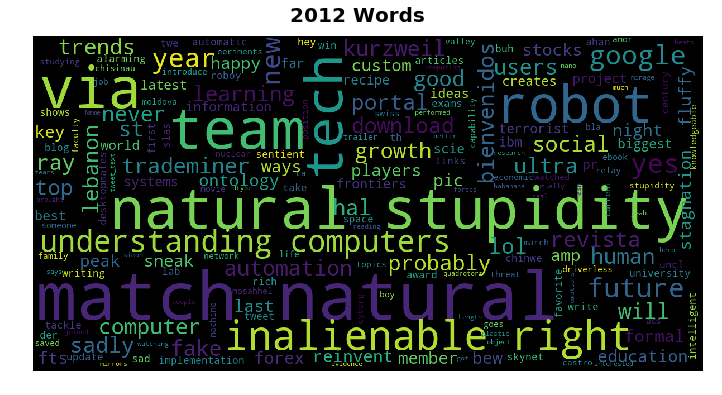

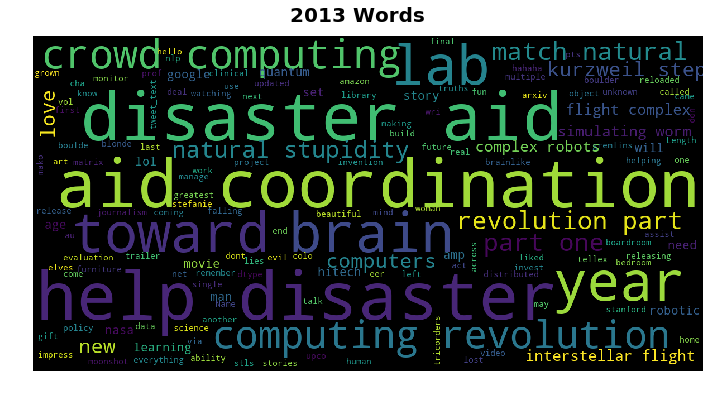

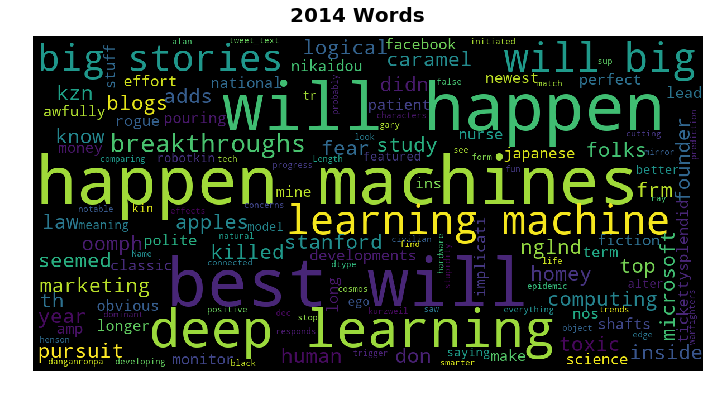

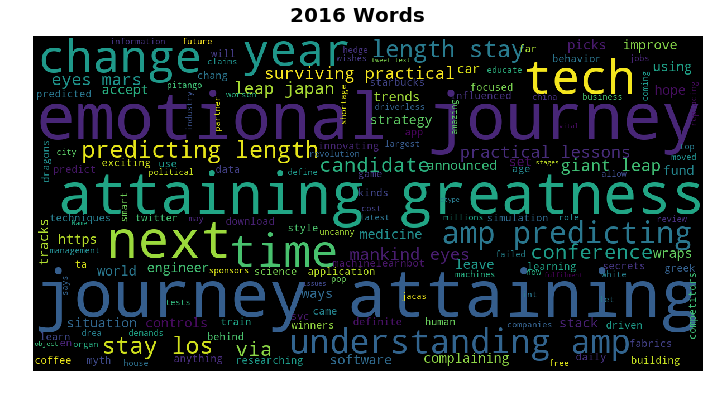

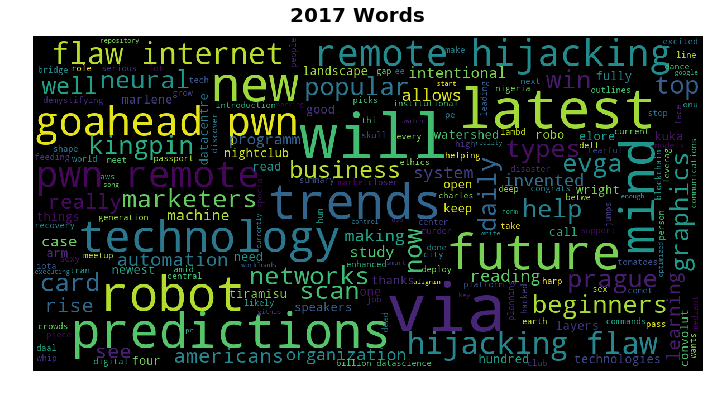

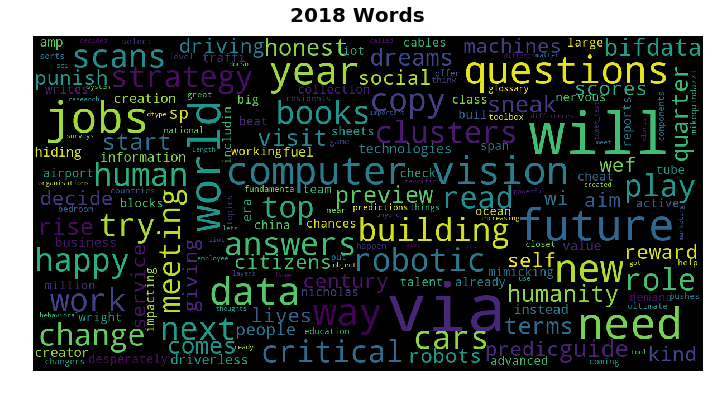

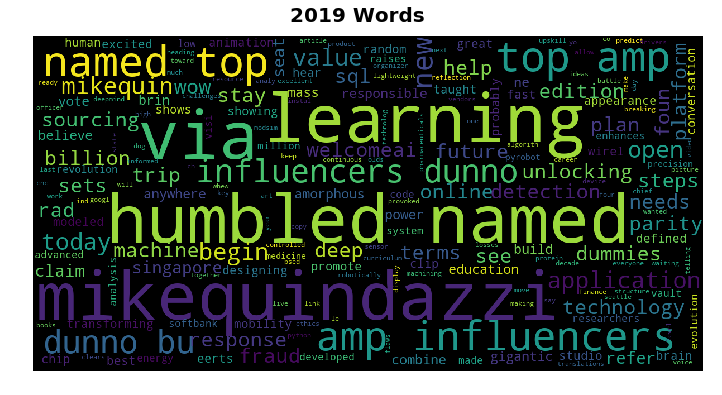

In [6]:
# generate Word Clouds for each year
stopwords_wc = set(STOPWORDS)
for year in all_years_clean.tweet_year.unique():
    display_wordcloud(all_years_clean.loc[all_years_clean['tweet_year'] == year, 'tweet_text'], 
                      random_state = 767, title = '{} Words'.format(year), 
                      file = '{}_words_cloud.png'.format(year), stopwords = stopwords_wc)

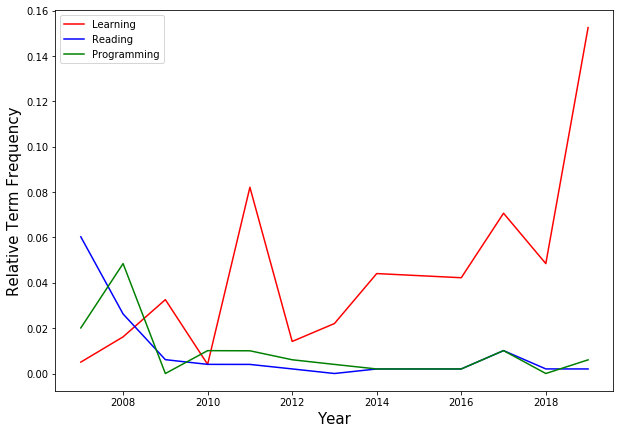

In [7]:
# plot usage of the words 'Learning', 'Reading', and 'Programming' over time
plt.figure(figsize = (10, 7))
plt.plot(all_years_by_year['tweet_year'], all_years_by_year['learning'], color = 'red')
plt.plot(all_years_by_year['tweet_year'], all_years_by_year['reading'], color = 'blue')
plt.plot(all_years_by_year['tweet_year'], all_years_by_year['programming'], color = 'green')
plt.legend(['Learning', 'Reading', 'Programming'])
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Relative Term Frequency', fontsize = 15)
plt.savefig('learning_reading_by_year.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

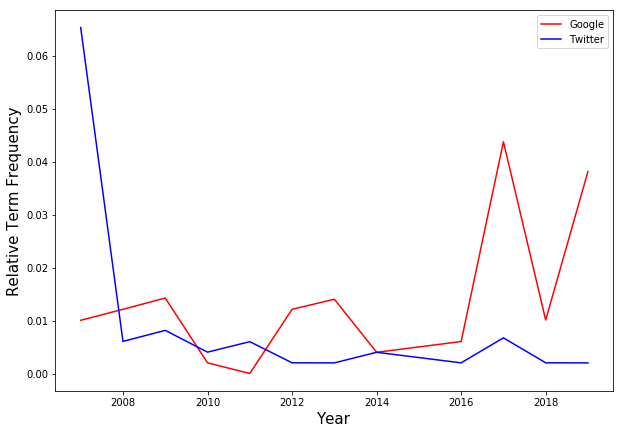

In [8]:
# plot usage of the words 'Google' and 'Twitter' over time
plt.figure(figsize = (10, 7))
plt.plot(all_years_by_year['tweet_year'], all_years_by_year['google'], color = 'red')
plt.plot(all_years_by_year['tweet_year'], all_years_by_year['twitter'], color = 'blue')
plt.legend(['Google', 'Twitter'])
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Relative Term Frequency', fontsize = 15)
plt.savefig('google_twitter_by_year.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [11]:
# generate document-term matrix for filtered all_years tweets using TF-IDF Vectorizer
all_years_doc_term2 = doc_term_matrix(all_years_clean2['tweet_text'], 'TFIDF')

# LSA of this matrix with 12 topics (one per year)
lsa = TruncatedSVD(12, random_state = 767)
all_years_doc_topic = lsa.fit_transform(all_years_doc_term2)
display_topics_svd(lsa, all_years_doc_term2.columns, 25)


Topic 1
stupidity, match, natural, fortune, beats, usually, unknown, real, work, don, lol, sadly, probably, better, aii, think, forward, hear, looking, enthusiast, true, revellers, compared, day, author

Topic 2
surge, near, future, facebook, fast, company, develop, used, human, brain, mimics, advertising, city, big, computer, coming, trends, just, vision, mogelijkheden, change, algorithms, wow, robots, technology

Topic 3
brain, mimics, human, intelligent, means, software, everyday, humans, happen, machines, best, digg, chip, lives, technology, modeled, live, reading, like, techradar, hack, warning, central, inspiration, summary

Topic 4
interstellar, flight, robots, complex, year, teach, replacing, south, english, korea, video, gather, jobs, eloring, humans, machines, mit, best, today, rise, happen, sex, hacked, murder, new

Topic 5
happen, best, machines, intelligent, humans, year, means, software, breakthroughs, learning, everyday, movie, amp, think, essential, going, computing, r

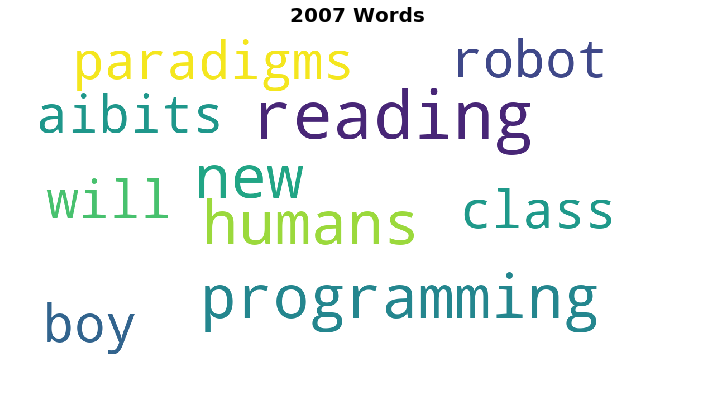

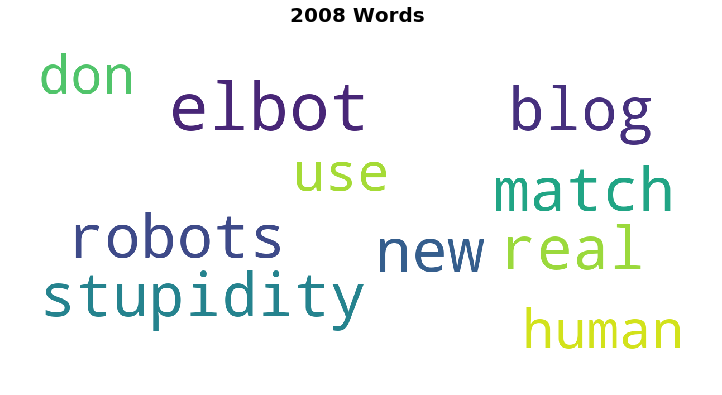

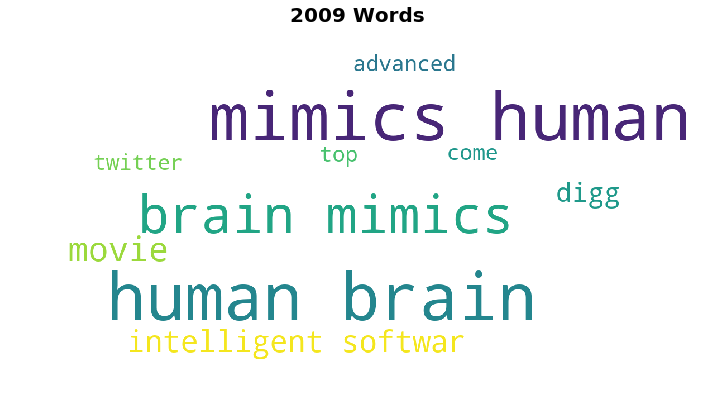

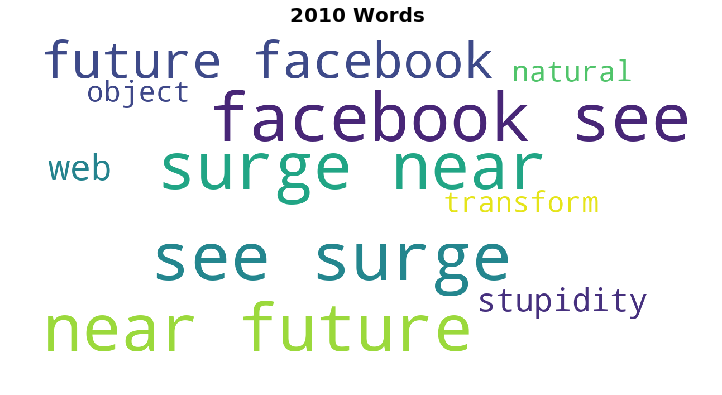

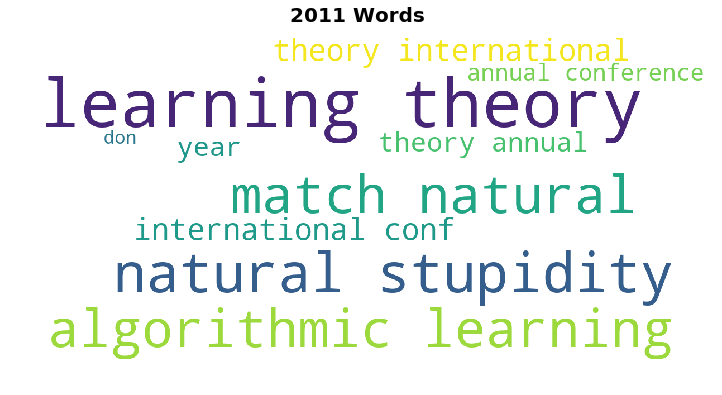

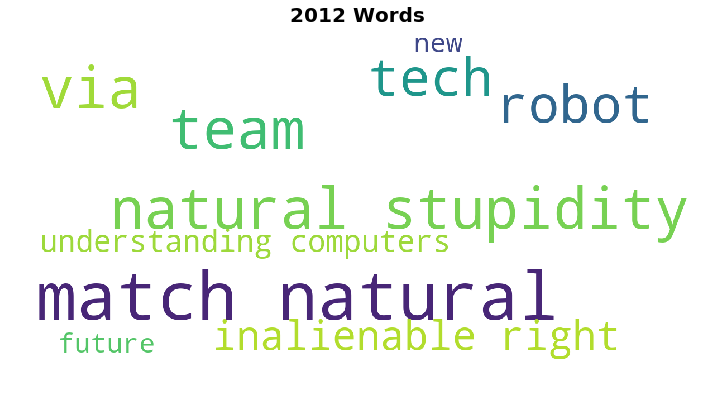

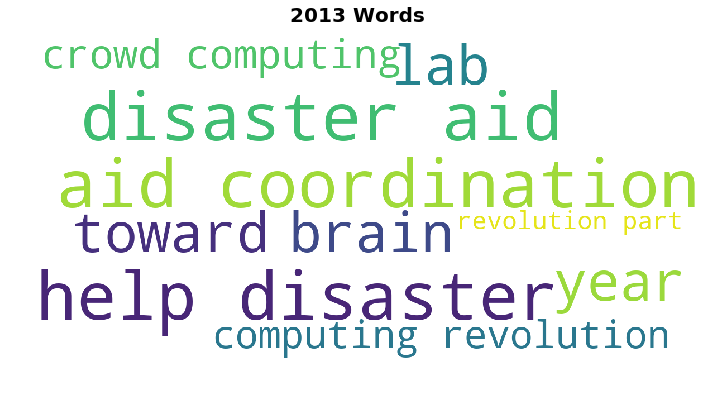

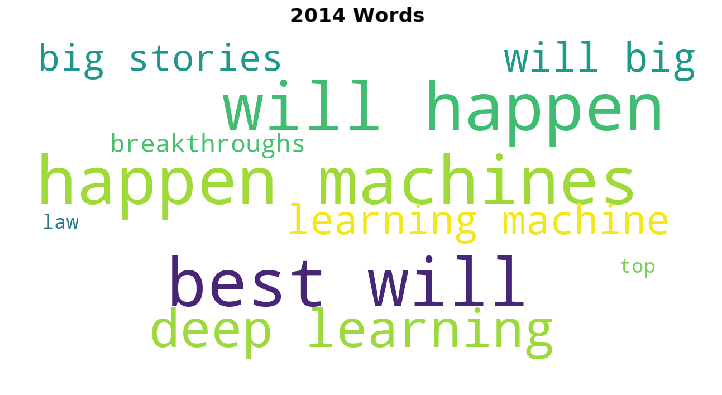

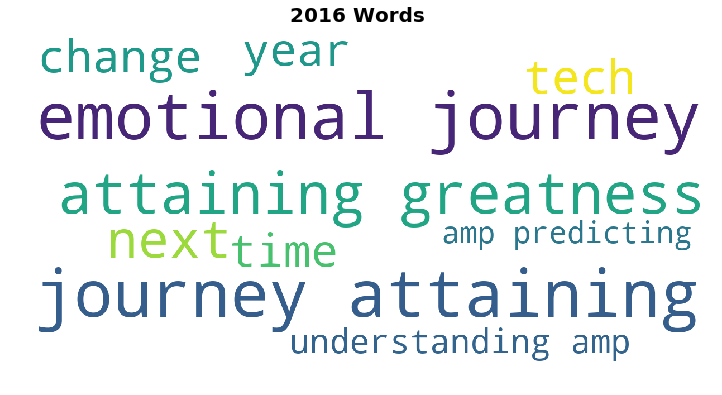

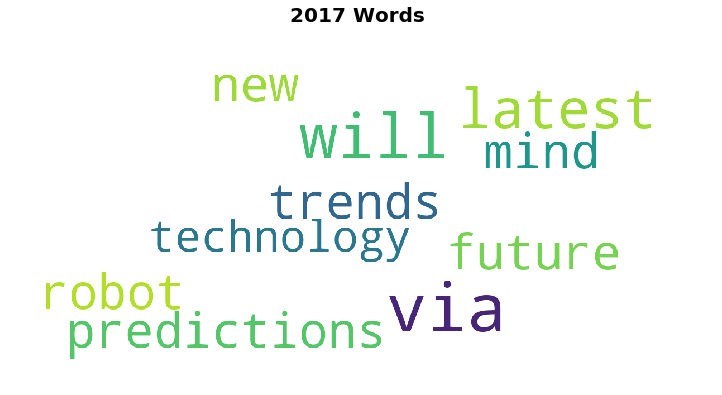

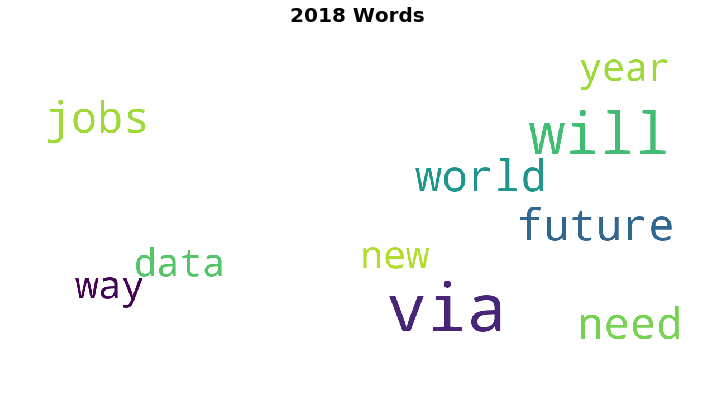

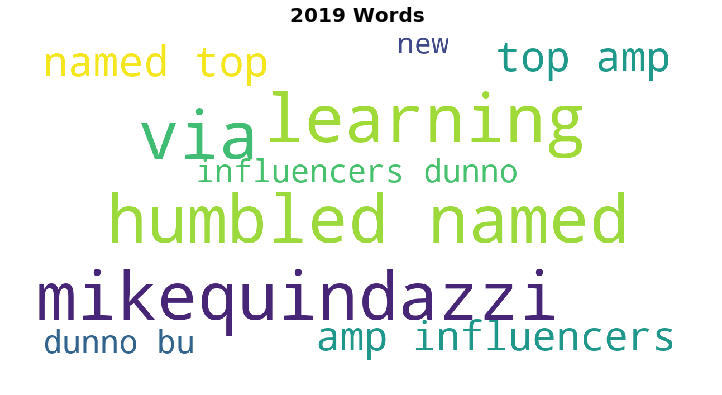

In [12]:
# display Word Clouds for each year
for year in all_years_clean2.tweet_year.unique():
    display_wordcloud(all_years_clean2.loc[all_years_clean2['tweet_year'] == year, 'tweet_text'], 
                      random_state = 767, title = '{} Words'.format(year), 
                      file = '{}_words_filtered_cloud.png'.format(year), stopwords = stopwords_wc,
                      bg_color = 'white', max_words = 10, prefer_horizontal = 1)

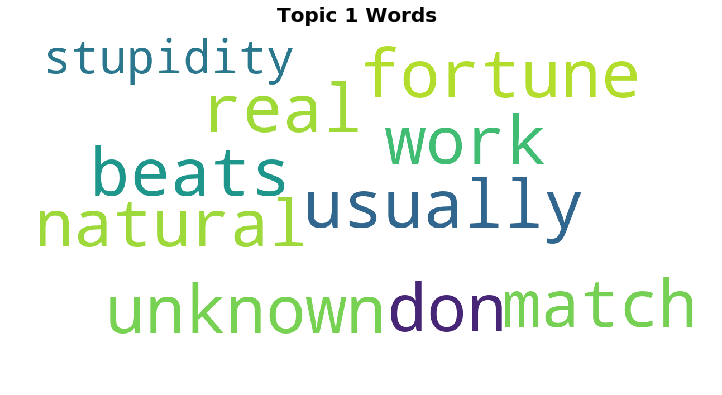

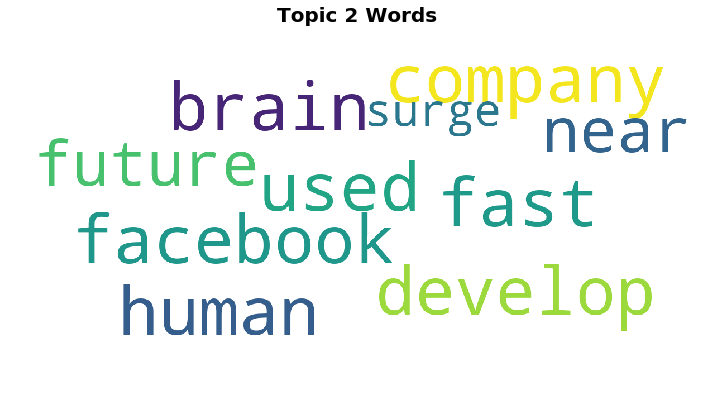

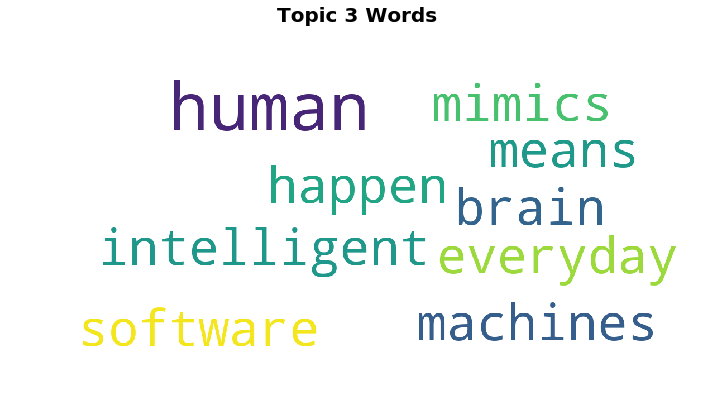

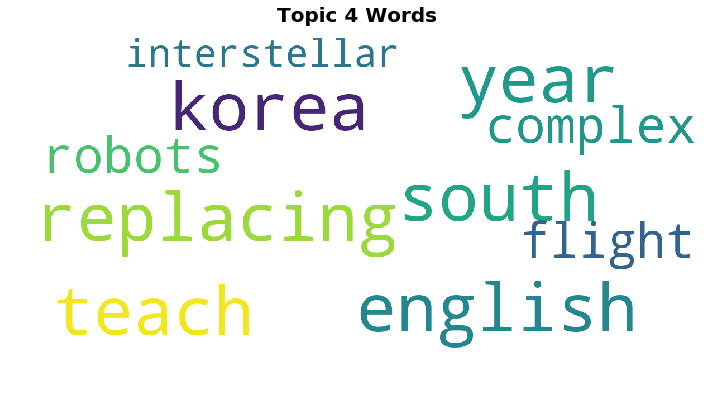

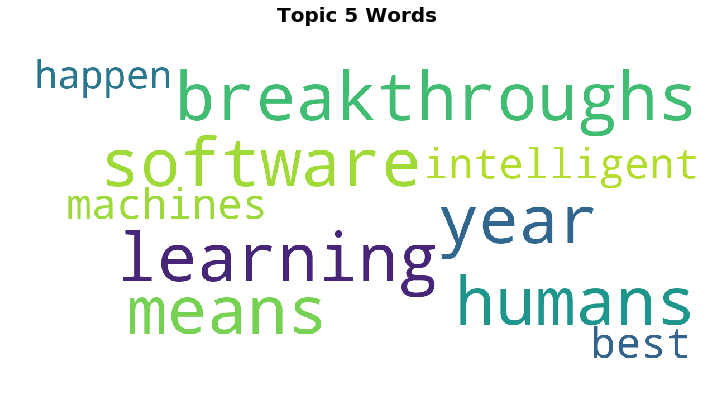

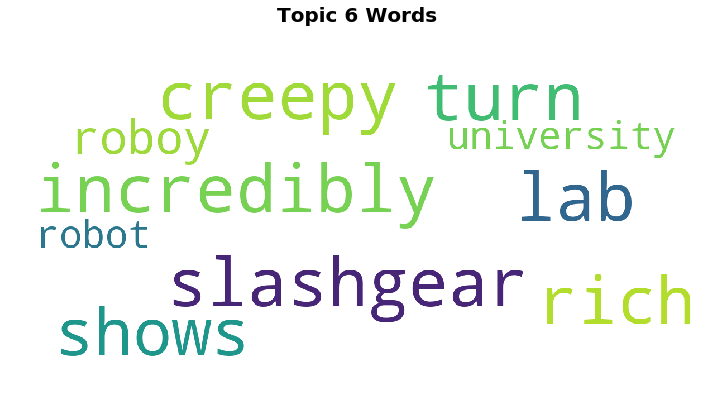

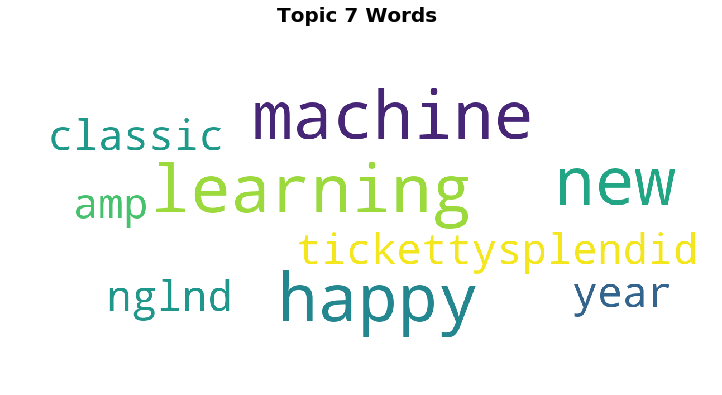

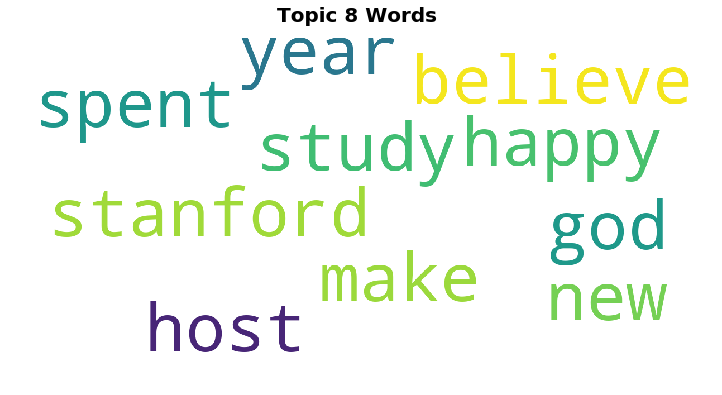

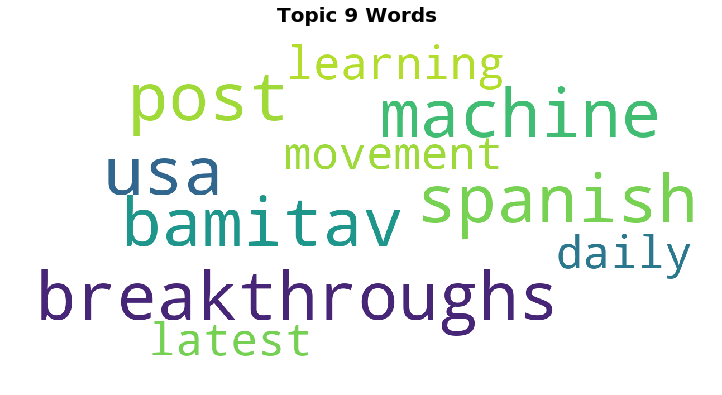

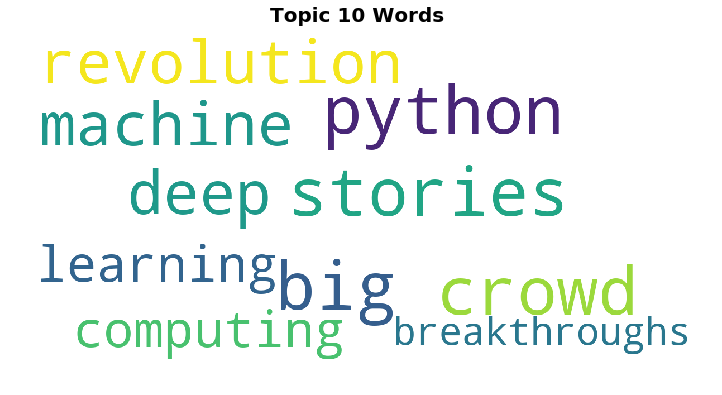

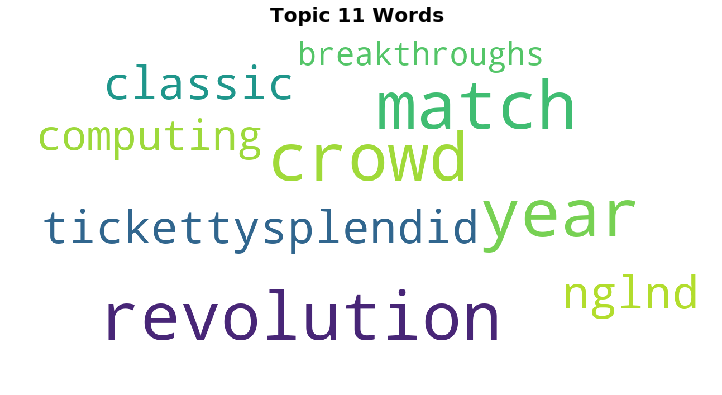

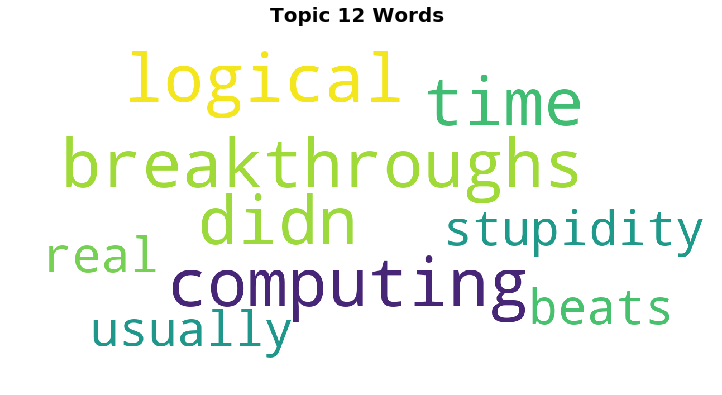

In [15]:
# display Word Clouds for each topic
for ind, topic in enumerate(lsa.components_):
    display_wordcloud(", ".join([all_years_doc_term2.columns[i] for i in topic.argsort()[-10:]]), 
                      random_state = 767, title = 'Topic {} Words'.format(ind + 1), 
                      file = 'topic{}_words_cloud.png'.format(ind + 1), stopwords = stopwords_wc,
                      bg_color = 'white', max_words = 10, prefer_horizontal = 1)

In [16]:
# compile document-topic array as DataFrame
all_years_doc_topic_df = pd.DataFrame(all_years_doc_topic.round(3), 
                                      index = all_years_clean2['tweet_text'], 
                                      columns = ['topic' + str(num) for num in range(1, 13)])
all_years_doc_topic_df.head(10)

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12
tweet_text,,,,,,,,,,,,
anyone involved work specifically anyone know any system that can recognise puns natural language,0.113,0.001,0.002,0.000,0.003,0.001,0.009,-0.001,-0.000,0.012,-0.012,-0.014
paradigms programming case studies common lisp,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.002,-0.000,0.001,-0.003,-0.001
update geekgirl love and sex with robots advances cont,0.000,0.002,0.002,0.120,0.002,0.001,0.013,0.008,-0.000,-0.000,-0.002,-0.000
speilberg movie based brian aldiss short story very creepy like better than robot,0.002,0.002,0.005,0.001,0.005,0.129,0.021,0.016,0.002,0.002,-0.006,0.011
paradigms programming,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.002,-0.000,0.002,-0.005,-0.002
chill dude your twirly brain wave patterns are fucking with the lesbian sexbot orbs production line,0.000,0.003,0.093,-0.001,-0.011,-0.000,0.000,-0.000,-0.000,0.002,-0.001,-0.001
leadership and two new issues shrinkrapradio were published shortly one aft,0.000,0.001,0.002,0.001,0.001,0.001,0.036,0.032,0.000,-0.000,-0.005,0.001
class intro and computer simulation official grade yay,0.000,0.002,0.002,0.000,0.000,0.000,0.006,0.002,0.001,0.004,-0.006,-0.001
aibits for advanced problem solving techniques,0.000,0.000,0.001,0.002,0.001,0.001,0.002,-0.000,0.000,0.004,-0.006,-0.001


In [17]:
all_years_doc_topic_df.shape

(5428, 12)

In [18]:
# save the document-term and document-topic DataFrames
all_years_doc_term2.to_pickle('all_years_doc_term.pickle')
all_years_doc_topic_df.to_pickle('all_years_doc_topic_df.pickle')

In [20]:
# add the year and sentiment score columns
all_years_doc_topic_df2 = pd.concat([all_years_doc_topic_df.reset_index(), 
                                     all_years_clean2[['tweet_year', 'sentiment2']]], axis = 1)
all_years_doc_topic_df2.head()

,tweet_text,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,tweet_year,sentiment2
0,anyone involved work specifically anyone know ...,0.113,0.001,0.002,0.000,0.003,0.001,0.009,-0.001,-0.000,0.012,-0.012,-0.014,2007.0,0.6
1,paradigms programming case studies common lisp,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.002,-0.000,0.001,-0.003,-0.001,2007.0,0.0
2,update geekgirl love and sex with robots advan...,0.000,0.002,0.002,0.120,0.002,0.001,0.013,0.008,-0.000,-0.000,-0.002,-0.000,2007.0,0.8
3,speilberg movie based brian aldiss short story...,0.002,0.002,0.005,0.001,0.005,0.129,0.021,0.016,0.002,0.002,-0.006,0.011,2007.0,0.5
4,paradigms programming,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.002,-0.000,0.002,-0.005,-0.002,2007.0,0.1


In [21]:
# calculate mean topic frequency by year (mean proportion of each topic in each document for the year)
all_years_by_year2 = all_years_doc_topic_df2\
    .drop(columns = 'tweet_text')\
    .groupby('tweet_year', as_index = False)\
    .mean()
all_years_by_year2

,tweet_year,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,sentiment2
0,2007.0,0.032221,0.004397,0.004508,0.003256,0.007402,0.006744,0.009714,0.004417,0.000930,0.003352,-0.006623,0.005231,0.182412
1,2008.0,0.026704,0.004761,0.007110,0.002637,0.003388,0.004182,0.014173,0.005684,0.005600,0.006261,-0.010416,0.011188,0.162041
2,2009.0,0.106857,0.013622,0.195769,0.001884,-0.010708,0.002151,0.011243,0.004490,0.001116,0.007878,-0.016414,0.017488,0.235102
3,2010.0,0.058604,0.219795,-0.003099,0.004333,0.001911,0.000988,0.006154,0.003047,-0.000116,0.002483,-0.007637,0.016408,0.135091
4,2011.0,0.188791,0.004074,0.005706,0.002936,0.005780,0.002780,0.016109,0.003721,0.001380,0.013821,-0.023296,0.013199,0.055852
5,2012.0,0.064129,0.003663,0.009474,0.002573,0.004431,0.123489,0.022283,0.008587,0.001938,0.004624,-0.004099,0.002715,0.135113
6,2013.0,0.054956,0.006169,0.005661,0.170958,0.004122,0.003494,0.034030,0.014512,0.001378,0.017544,-0.004918,-0.000398,0.216667
7,2014.0,0.012988,0.011072,0.018026,0.004333,0.128737,0.003239,0.099687,-0.015556,0.001835,0.035432,0.052691,0.017645,0.263253
8,2016.0,0.004553,0.009181,0.006213,0.002060,0.012040,0.003213,0.028370,0.010849,0.067678,0.011125,-0.008753,0.000402,0.233199
9,2017.0,0.000946,0.015404,0.019687,0.004057,0.007747,0.002677,0.032906,0.005764,0.012933,0.014569,-0.022892,-0.003690,0.300337


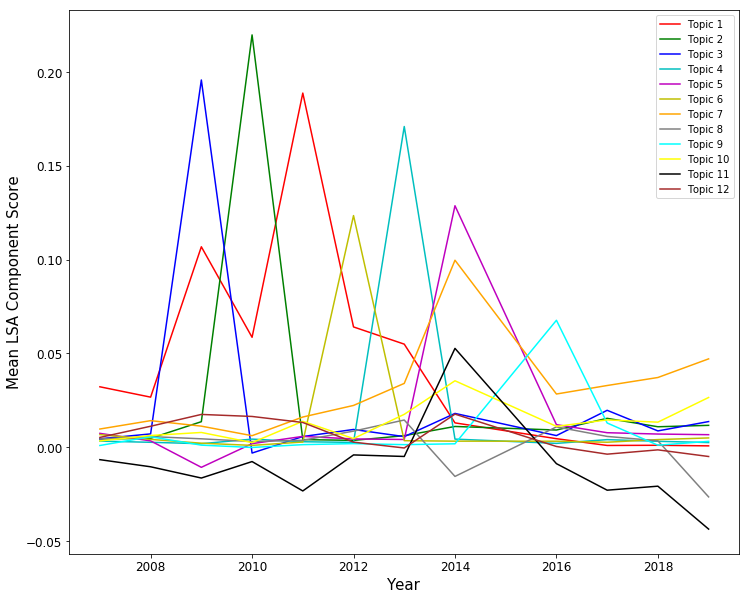

In [24]:
# plot mean topic frequency over time for each topic
plt.figure(figsize = (12, 10))
colors = cycle(['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'gray', 'aqua', 'yellow', 'black', 'brown'])
for c, topic in zip(colors, all_years_by_year2.columns[1:13]):
    plt.plot(all_years_by_year2['tweet_year'], all_years_by_year2[topic], color = c)

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Mean LSA Component Score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(['Topic {}'.format(i) for i in range(1, 13)])
plt.savefig('topic_scores_by_year.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()